In [15]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
# memuat data
data = pd.read_csv("/content/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:9]  #independent colums
y = data.iloc[:,1]    # target colum i.e price range

In [21]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs        Score
0         Serial No.  1985.635336
1          GRE Score   165.798403
2        TOEFL Score   104.923768
3  University Rating    90.541075
7           Research    82.159971
4                SOP    53.531042
5               LOR     37.050715
6               CGPA    12.090293
8   Chance of Admit      7.881012


In [23]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [24]:
# memuat data
data = pd.read_csv("/content/Admission_Predict.csv")
X = data.iloc[:,0:9]  #independent columns
y = data.iloc[:,1]    #target column i.e price range

In [25]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.0872179  0.38668088 0.09639259 0.05406826 0.07797887 0.0724334
 0.1081761  0.01887648 0.09817553]


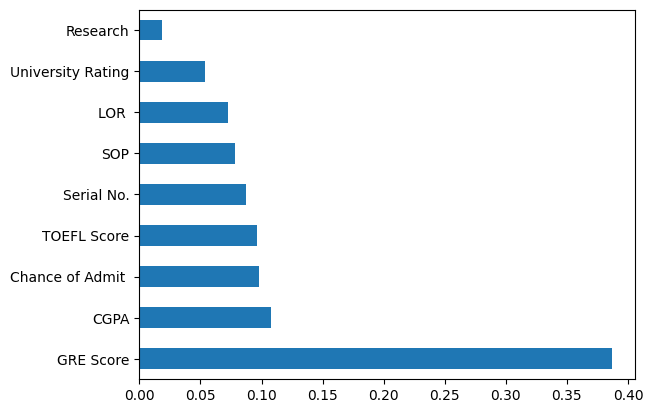

In [26]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
# memuat data
data = pd.read_csv("/content/Admission_Predict.csv")
X = data.iloc[:,0:9]  #independent columns
y = data.iloc[:,1]    #target column i.e price range

In [31]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

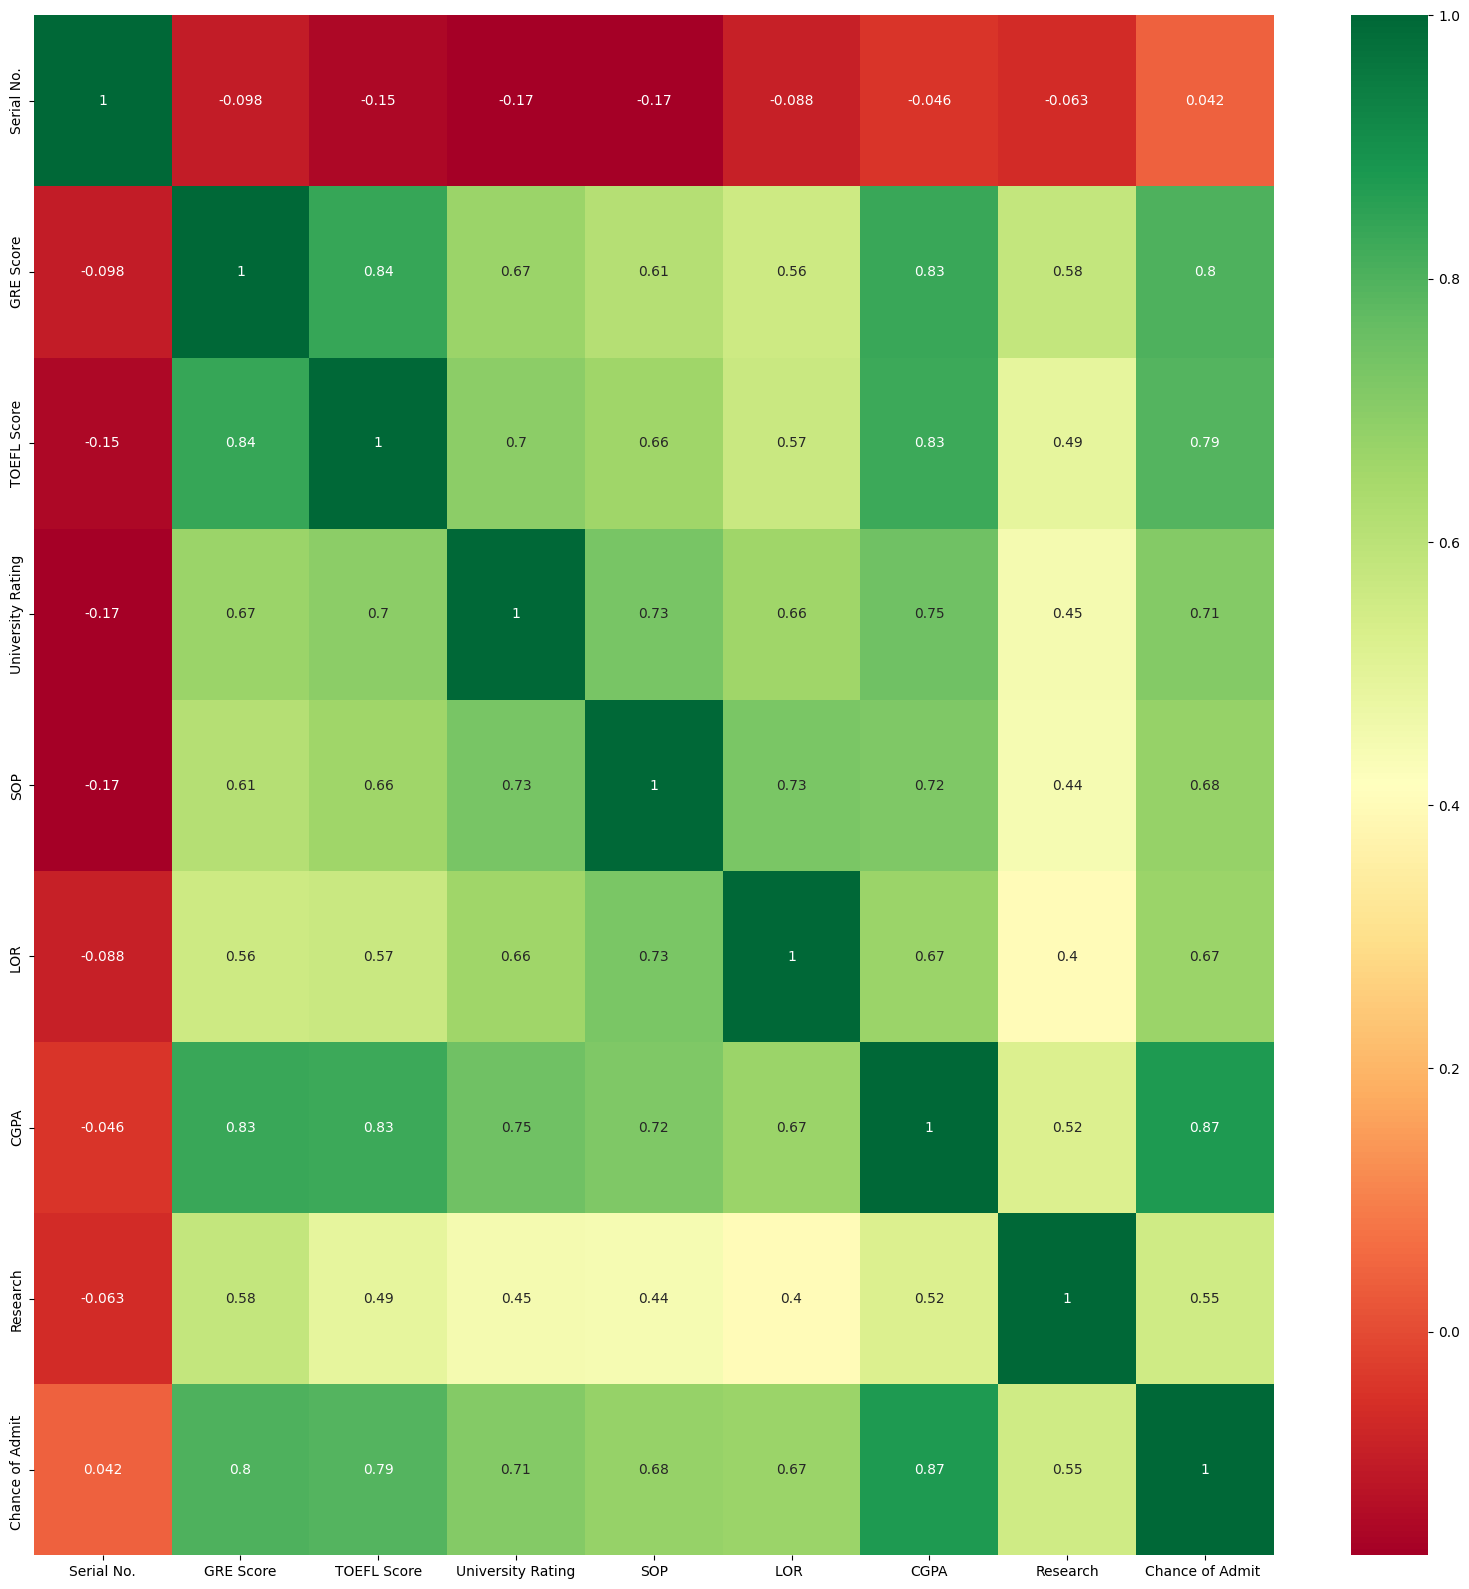

In [32]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

KESIMPULAN
1. pada variabel chance of Admint berkolerasi positif dengan variabel GRE score dan CGPA
2. berkolerasi negatif dengan variabel Serial No
